In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
data_train_file  = '../train.csv'
train_data = pd.read_csv(data_train_file)
data_test_file  = "../test.csv"
test_data = pd.read_csv(data_test_file)

### CHECKING TRAIN DATA

In [4]:
print(train_data.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [5]:
print(train_data.columns)

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


In [6]:
print(len(train_data))

159571


### DATA ANALYSIS

In [7]:
lens = train_data.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(394.0732213246768, 590.7202819048919, 5000)

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  length  
0             0        0       0       0              0     264  
1             0        0       0       0              0     112  
2             0        0       0       0              0     233  
3             0        0       0       0              0     622  
4             0        0       0       0              0      67  


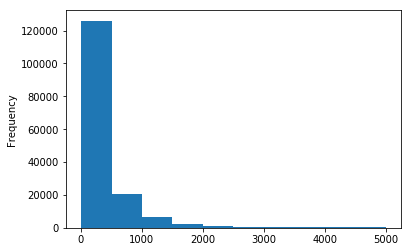

In [8]:
%matplotlib inline
train_data['length'] = lens
print(train_data.head())
train_data.length.plot('hist')
plt.show()

### Preparing data for training

In [10]:
def remove_punctuation(text):
    import string
    text = text.lower()
    translator =str.maketrans('', '', string.punctuation)
    return (text.translate(translator))


train_data['comment'] = train_data['comment_text'].apply(remove_punctuation)
train_data['comment'] = train_data['comment'].replace('\n','', regex=True)

## Preprocessed Data
print(train_data['comment'].head())

0    explanationwhy the edits made under my usernam...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    morei cant make any real suggestions on improv...
4    you sir are my hero any chance you remember wh...
Name: comment, dtype: object


### Preprocess Test data

In [11]:
test_data['comment'] = test_data['comment_text'].apply(remove_punctuation)
test_data['comment'] = test_data['comment'].replace('\n','', regex=True)
print(test_data.head())


                 id                                       comment_text  \
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3  00017563c3f7919a  :If you have a look back at the source, the in...   
4  00017695ad8997eb          I don't anonymously edit articles at all.   

                                             comment  
0  yo bitch ja rule is more succesful then youll ...  
1          from rfc   the title is fine as it is imo  
2            sources    zawe ashton on lapland —      
3  if you have a look back at the source the info...  
4            i dont anonymously edit articles at all  


### FEATURE EXTRACTION AND TRAINING MODEL

In [12]:
# Taking both train data and test data to calculate features at once
data = train_data.append(test_data)
#fetching comment for imput
Comment = data['comment']
Comment = Comment.tolist()
#fetching the output labels for each comment
y_train = train_data.iloc[:,2:8]
y_train = np.array(y_train)



## using scikit learn to calculate count vector for each comment
## Creating the vectorizer
vectorizer = CountVectorizer()
vectorizer


## Calculating count vector of dataset and to be used as an input for my model.
X = vectorizer.fit_transform(Comment)
X_train = X[0:len(train_data)]
X_test = X[len(train_data):]



## Creating classifer one vs rest through SVM for training my model
classif = OneVsRestClassifier(SGDClassifier(loss="hinge", penalty="l2"))
classif.fit(X_train, y_train)

c:\users\ridhima\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\ridhima\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
          n_jobs=1)

### Predicting on test data

In [13]:
y_predict = classif.predict(X_test)
print(y_predict)

[[1 0 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]]


### GENERATING FINAL OUTPUT FOR TEST DATA

In [14]:
from collections import OrderedDict
id = test_data['id']
id.tolist()
toxic = y_predict[0:,0]
toxic.tolist()
severe_toxic = y_predict[0:,1]
severe_toxic.tolist()
obscene = y_predict[0:,2]
obscene.tolist()
threat = y_predict[0:,3]
threat.tolist()
insult = y_predict[0:,4]
insult.tolist()
identity_hate = y_predict[0:,5]
identity_hate.tolist()
df = pd.DataFrame( OrderedDict({'id':id,'toxic':toxic,'severe_toxic':severe_toxic,'obscene':obscene,'threat':threat,'insult':insult,'identity_hate':identity_hate}  ) )
print(df)

                      id  toxic  severe_toxic  obscene  threat  insult  \
0       00001cee341fdb12      1             0        1       0       1   
1       0000247867823ef7      0             0        0       0       0   
2       00013b17ad220c46      0             0        0       0       0   
3       00017563c3f7919a      0             0        0       0       0   
4       00017695ad8997eb      0             0        0       0       0   
5       0001ea8717f6de06      0             0        0       0       0   
6       00024115d4cbde0f      0             0        0       0       0   
7       000247e83dcc1211      0             0        0       0       0   
8       00025358d4737918      0             0        0       0       0   
9       00026d1092fe71cc      0             0        0       0       0   
10      0002eadc3b301559      0             0        0       0       0   
11      0002f87b16116a7f      0             0        0       0       0   
12      0003806b11932181      0       

In [15]:
df.to_csv('submissions_countvector.csv', sep=',',index=False)